In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns

In [2]:
df=pd.read_csv('BlackFriday.csv')

del df['Product_Category_2']
del df['Product_Category_3']
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
len(df)

537577

# Analysing Columns

In [4]:
len(df['User_ID'].unique())

5891

In [5]:
(df['Product_ID'].nunique())

3623

In [6]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [7]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [8]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [9]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [10]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [11]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [12]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [13]:
df['Purchase'].nunique()

17959

In [14]:
df['Purchase'].sum()

5017668378

In [15]:
for i in df.columns:
    print(i,"---->",df[i].nunique())

User_ID ----> 5891
Product_ID ----> 3623
Gender ----> 2
Age ----> 7
Occupation ----> 21
City_Category ----> 3
Stay_In_Current_City_Years ----> 5
Marital_Status ----> 2
Product_Category_1 ----> 18
Purchase ----> 17959


# Analyzing Gender Column

In [16]:
print(" "+"_"*60)
countm=0
for i in df['Gender']:
    if(i=='M'):
        countm+=1
        
print("| The number of Male customers are:",countm,"\t\t     |")

countf=0
for i in df['Gender']:
    if(i=='F'):
        countf+=1
        
print("| The number of Female customers are:",countf,"\t\t     |")
print("|"+"_"*60+"|")

 ____________________________________________________________
| The number of Male customers are: 405380 		     |
| The number of Female customers are: 132197 		     |
|____________________________________________________________|


In [17]:
print("MALE customers:",len(df[df['Gender']=='M']))
print("FEMALE customers:",len(df[df['Gender']=='F']))

MALE customers: 405380
FEMALE customers: 132197


In [18]:
data=pd.DataFrame({'Ratio':(countm, countf)}, index=['Male','Female'])
data

,Ratio
Male,405380
Female,132197


<AxesSubplot:>

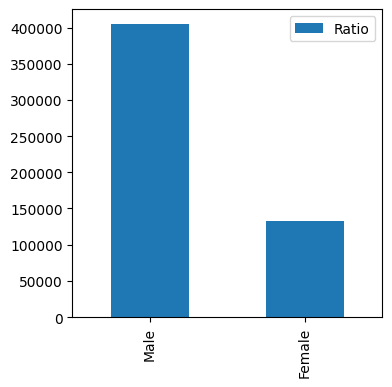

In [19]:
data.plot.bar(y='Ratio',figsize=(4,4))

<AxesSubplot:ylabel='Ratio'>

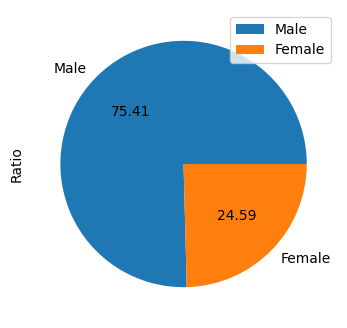

In [20]:
data.plot.pie(y='Ratio',figsize=(4,4),autopct="%.2f")

<AxesSubplot:title={'center':'Gender Ratio'}, xlabel='Gender'>

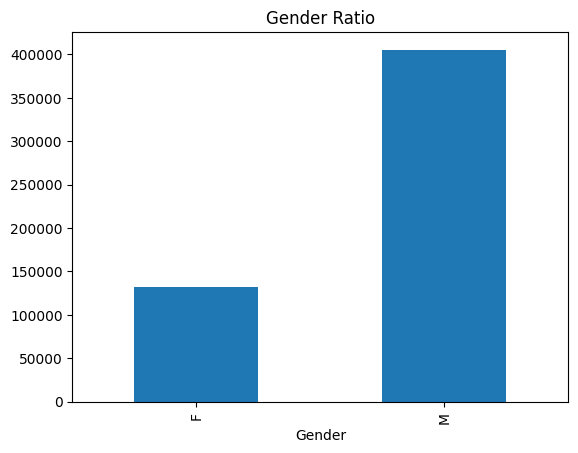

In [21]:
df.groupby('Gender').size().plot(kind='bar',
                                 title="Gender Ratio")

# How much money male/female customers have spent

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_18992\1535798339.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase'].plot(kind='pie',


<AxesSubplot:title={'center':'Purchases'}, ylabel='Purchase'>

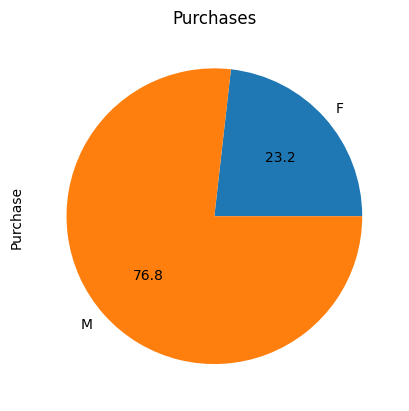

In [22]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',
                                           autopct="%.1f",
                                           title="Purchases")

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_18992\701064289.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind='pie',


<AxesSubplot:title={'center':'Average amount spent'}, ylabel='Purchase'>

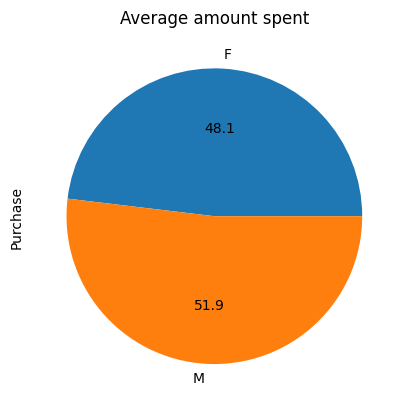

In [23]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie',
                                           autopct="%.1f",
                                           title="Average amount spent")

***By these graphs we get to know that Male customers are buying more than Female Customers but the avg amount spent by female 
customers is more that means females are buying more expensive stuff than male but in less amount***

# Analyzing Age and marital status

In [24]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

In [25]:
df.groupby('Marital_Status').size()

Marital_Status
0    317817
1    219760
dtype: int64

<AxesSubplot:title={'center':'Age ratio'}, xlabel='Age'>

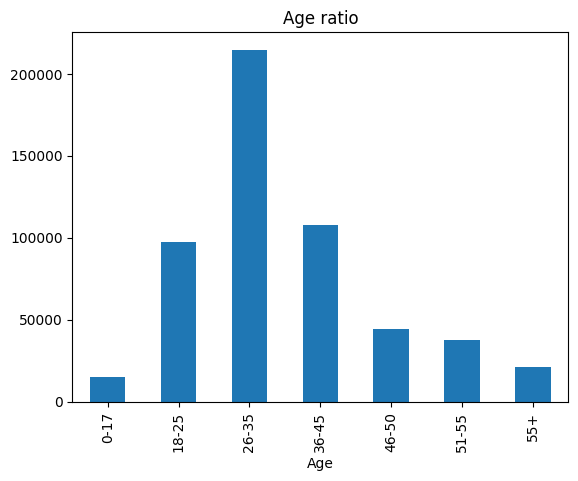

In [26]:
df.groupby('Age').size().plot(kind='bar',
                             title='Age ratio')

<AxesSubplot:title={'center':'Marital_status ratio'}, xlabel='Marital_Status'>

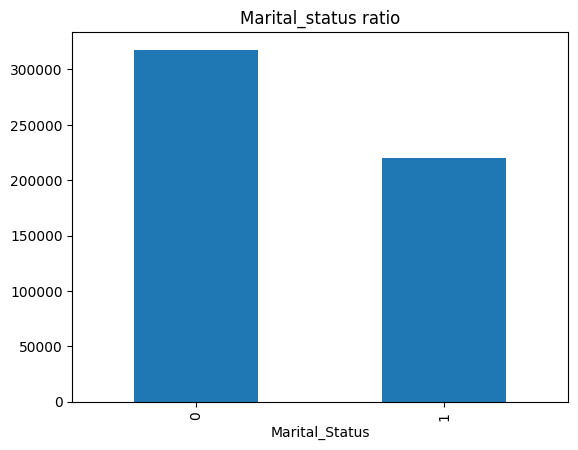

In [27]:
df.groupby('Marital_Status').size().plot(kind='bar',
                                        title='Marital_status ratio')

In [28]:
l=[]
for i in df['Age'].unique():
    l.append([i,df[df['Age']==i]['Product_ID'].nunique()])
print(l)

[['0-17', 2300], ['55+', 2573], ['26-35', 3419], ['46-50', 3099], ['51-55', 2877], ['36-45', 3318], ['18-25', 3213]]


In [29]:
data=pd.DataFrame(l,columns=['Age','Unique Products Bought'])

In [30]:
data

,Age,Unique Products Bought
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<AxesSubplot:xlabel='Age'>

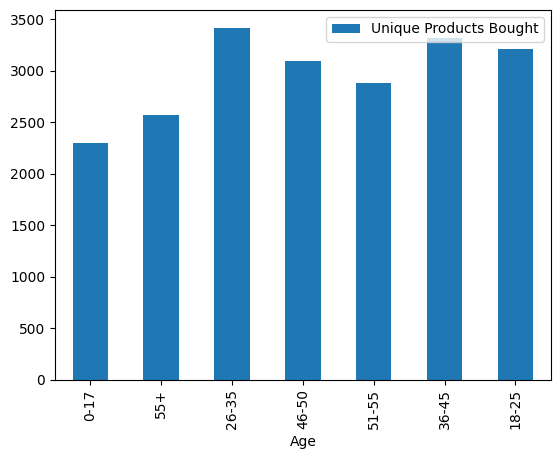

In [31]:
data.plot.bar(x='Age')

# Multi column analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

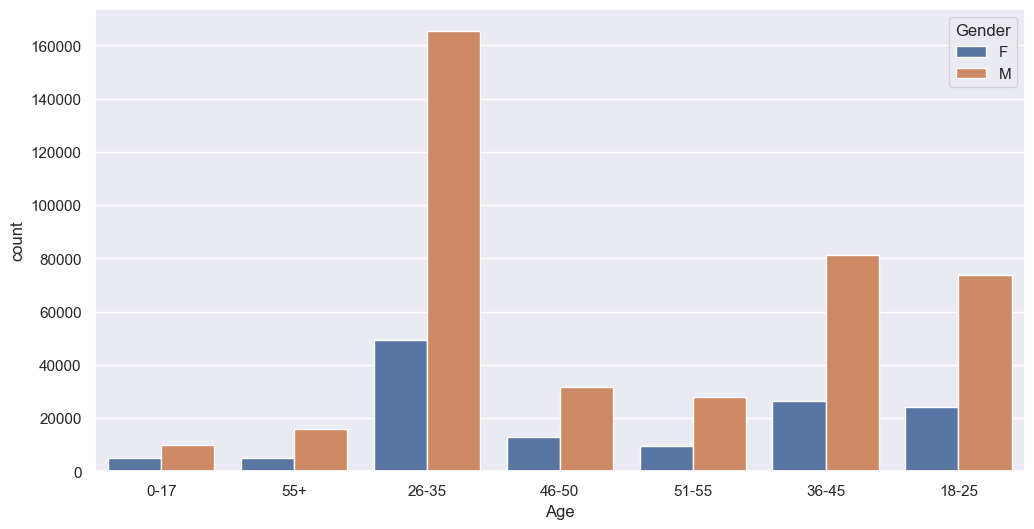

In [32]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

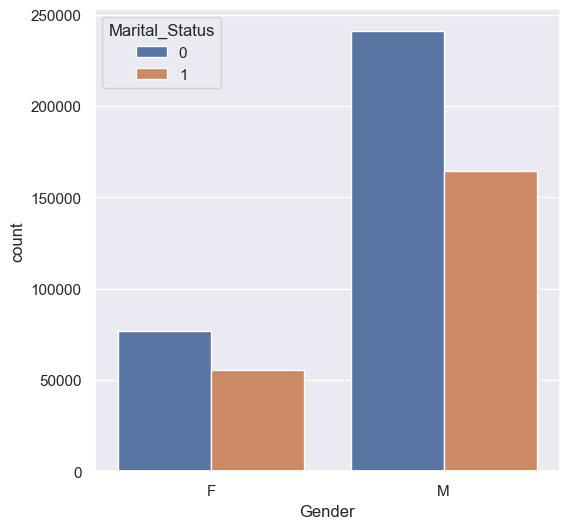

In [33]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

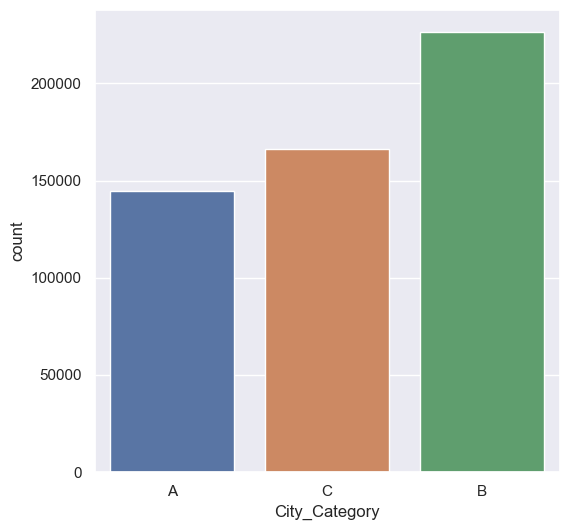

In [34]:
sns.countplot(x='City_Category',data=df)

<AxesSubplot:>

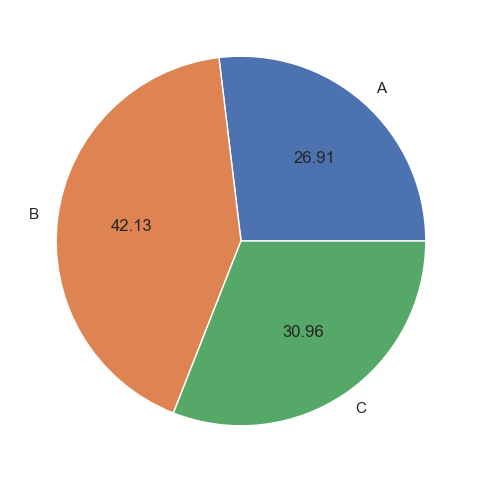

In [35]:
df.groupby('City_Category').size().plot(kind='pie',autopct="%.2f")

<AxesSubplot:xlabel='City_Category', ylabel='count'>

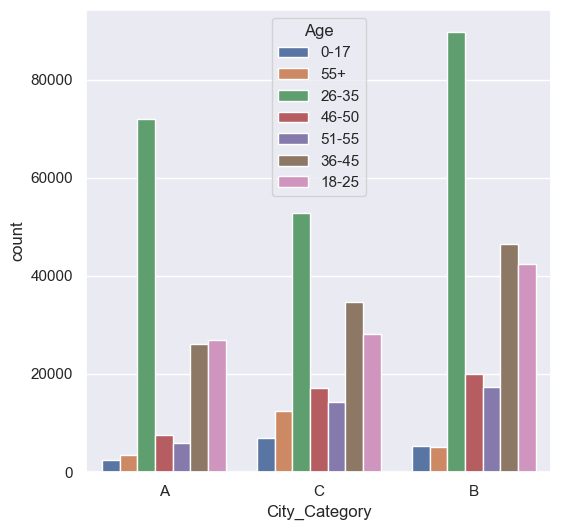

In [36]:
sns.countplot(x='City_Category',hue='Age',data=df)

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_18992\2399155030.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct='%.1f')


<AxesSubplot:ylabel='Purchase'>

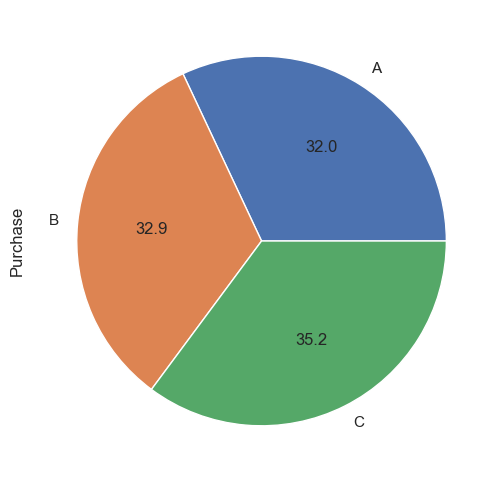

In [37]:
df.groupby('City_Category').mean()['Purchase'].plot(kind='pie',autopct='%.1f')

# Occupation and product analysis

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

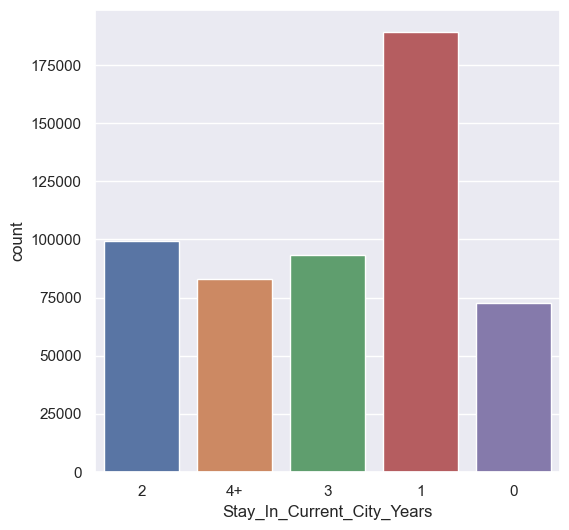

In [38]:
sns.countplot(x='Stay_In_Current_City_Years',data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

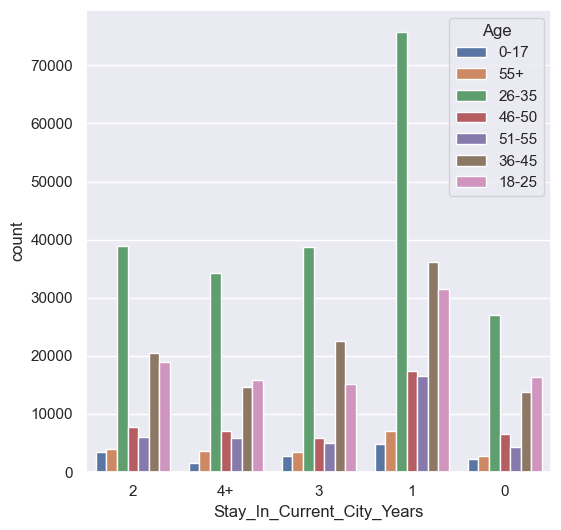

In [39]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Age',data=df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

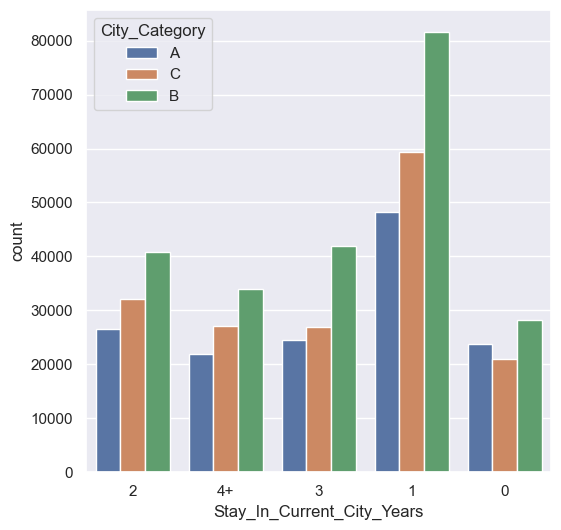

In [40]:
sns.countplot(x='Stay_In_Current_City_Years',hue='City_Category',data=df)

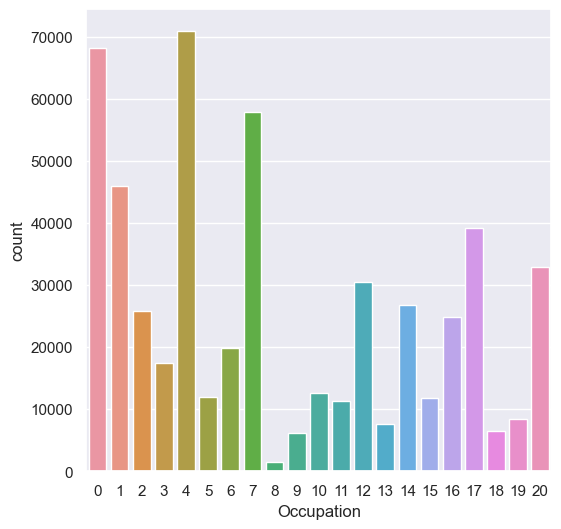

In [41]:
sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(19,6)})

<AxesSubplot:xlabel='Occupation'>

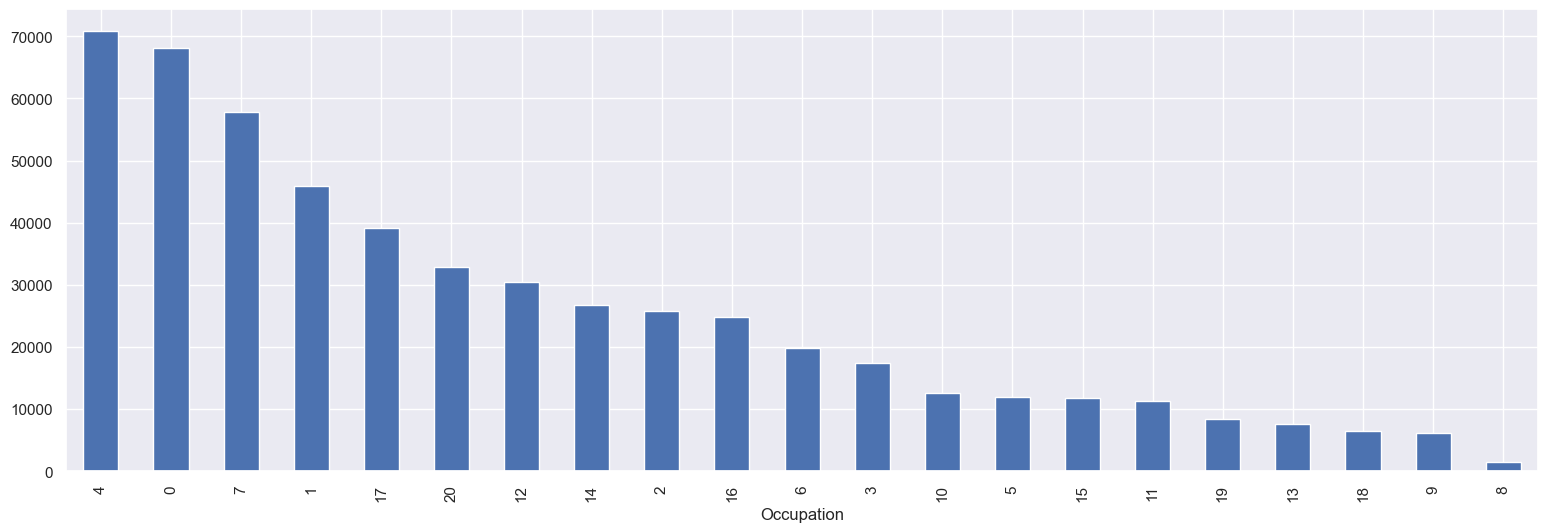

In [42]:
df.groupby('Occupation').size().sort_values(ascending=False).plot(kind='bar')

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_18992\2482216452.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').mean()['Purchase'].sort_values(ascending=False).plot(kind='bar')


<AxesSubplot:xlabel='Occupation'>

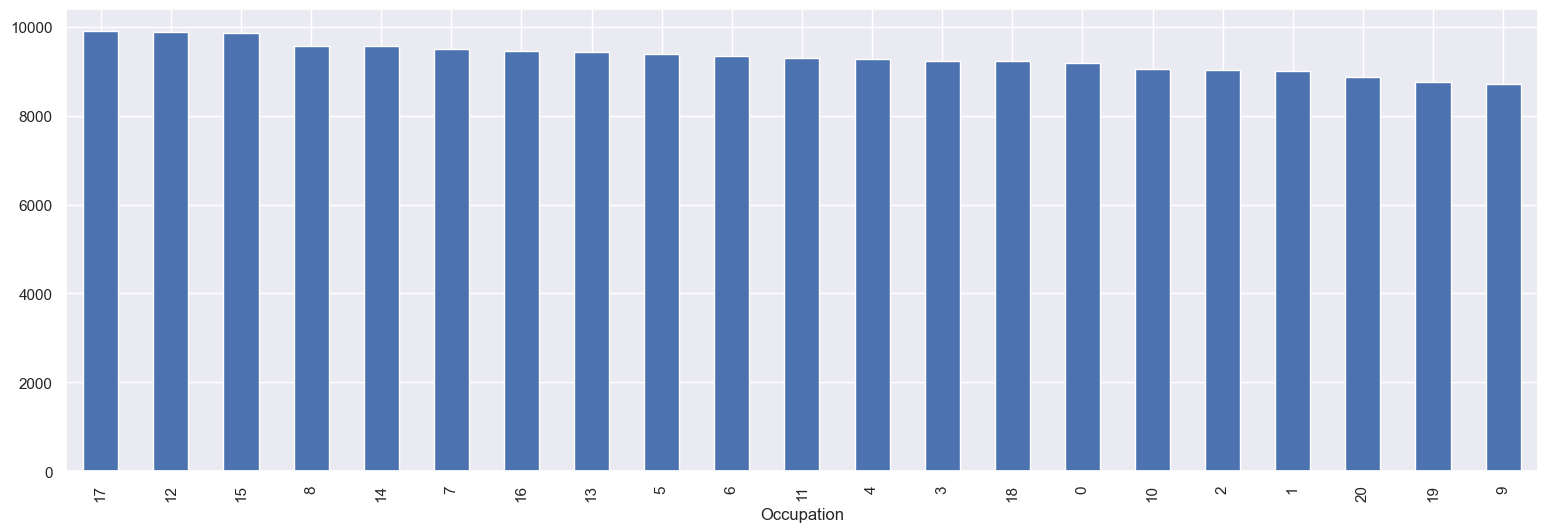

In [43]:
df.groupby('Occupation').mean()['Purchase'].sort_values(ascending=False).plot(kind='bar')

In [44]:
 df.groupby('Occupation').nunique()['Product_ID'].sort_values()

Occupation
8     1026
9     1820
13    1946
18    2047
10    2110
15    2168
11    2235
19    2303
5     2344
3     2657
12    2664
14    2680
6     2724
17    2831
16    2863
2     2892
1     3020
7     3070
20    3147
4     3174
0     3243
Name: Product_ID, dtype: int64

<AxesSubplot:xlabel='Product_Category_1'>

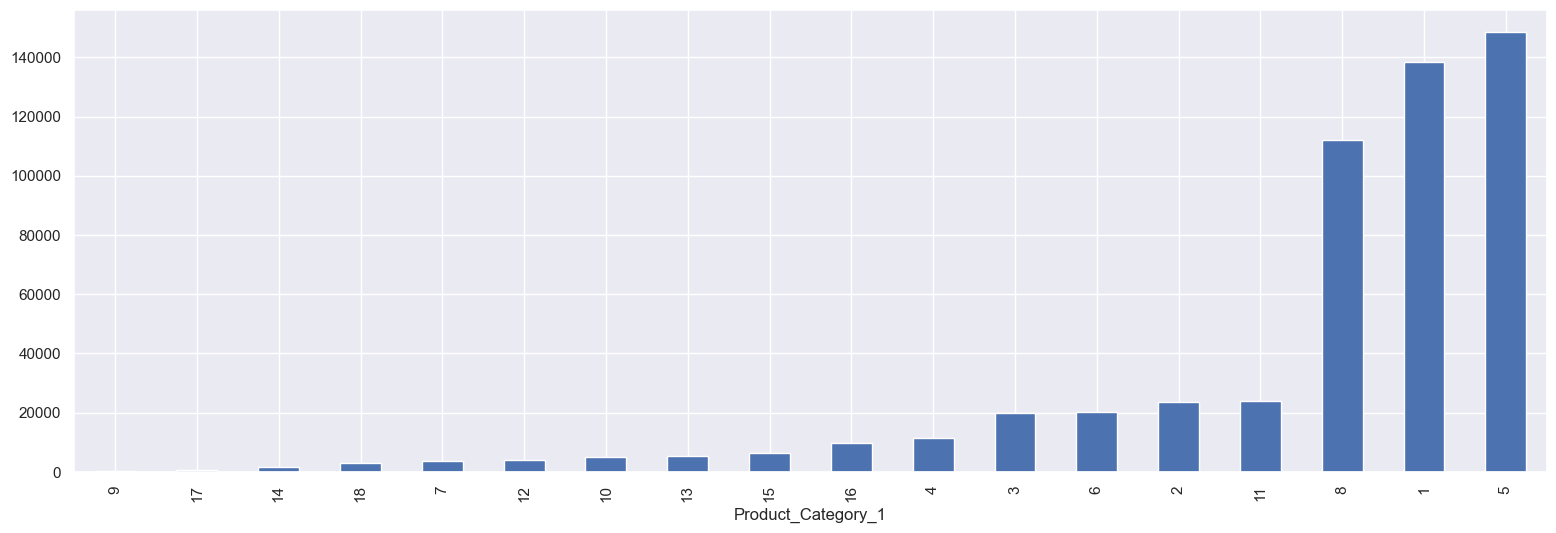

In [45]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_18992\594745959.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')


<AxesSubplot:xlabel='Product_Category_1'>

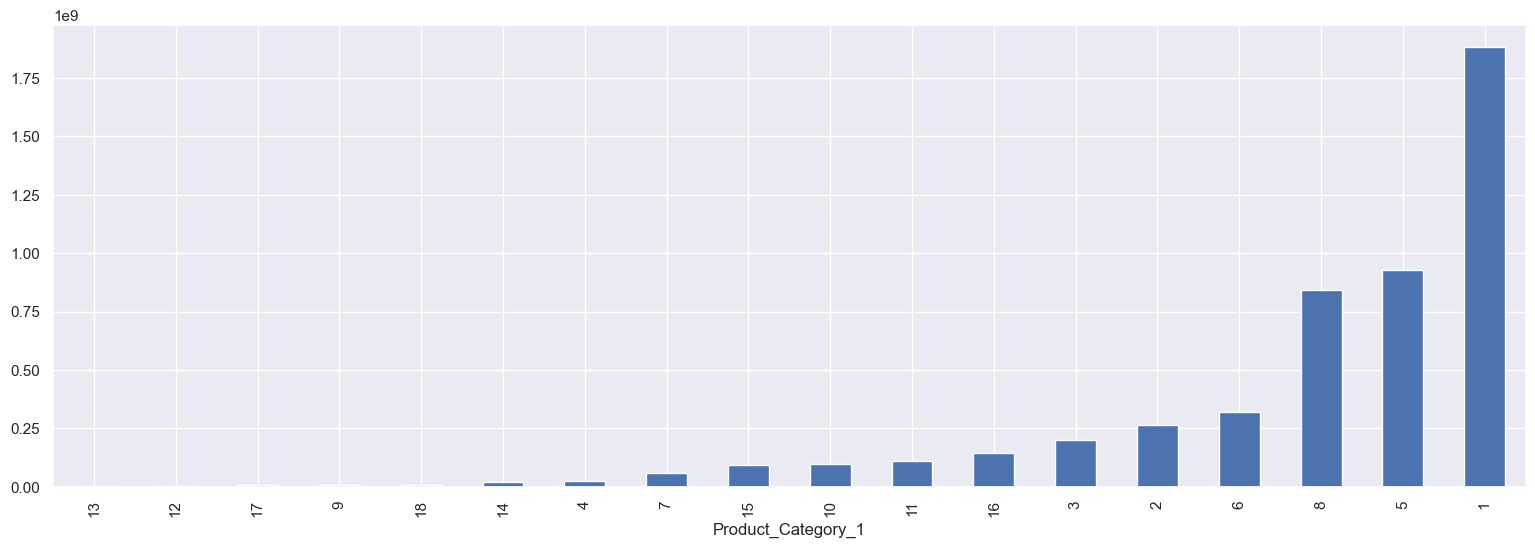

In [46]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_18992\224135489.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')


<AxesSubplot:xlabel='Product_Category_1'>

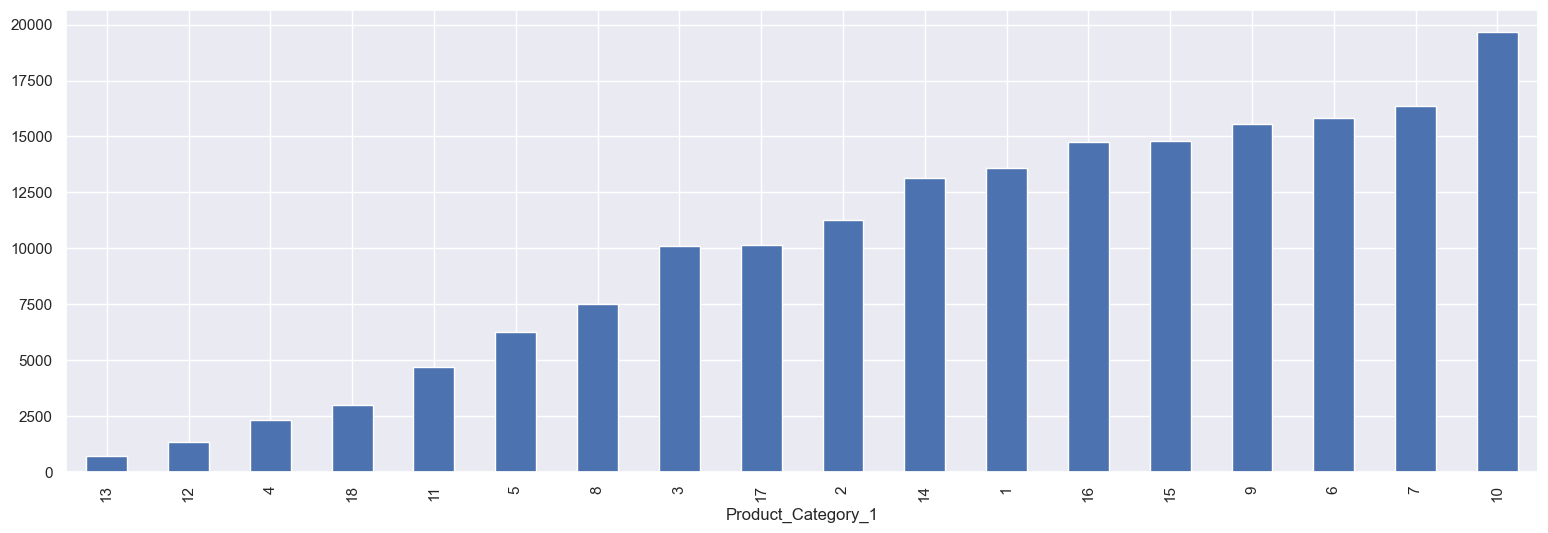

In [47]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind='bar')

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_18992\2901021818.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').sum()['Purchase'].sort_values().nlargest(10).plot(kind='bar')


<AxesSubplot:xlabel='Product_ID'>

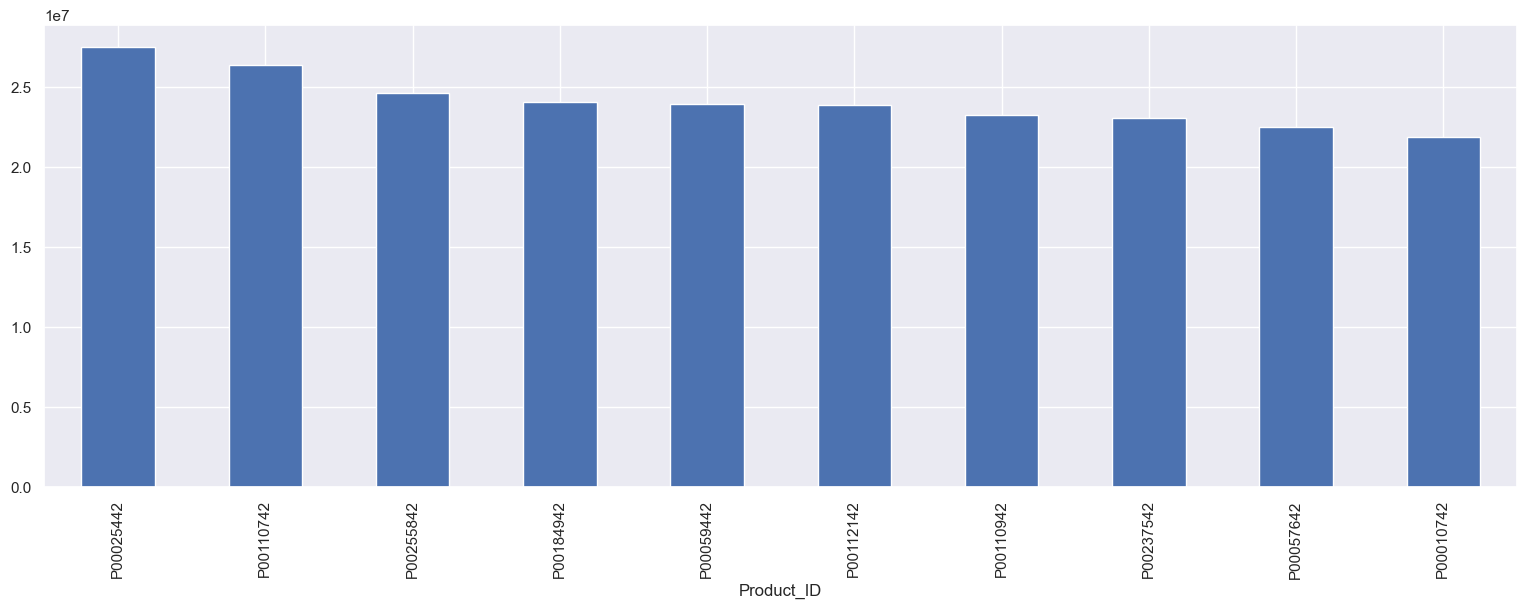

In [48]:
df.groupby('Product_ID').sum()['Purchase'].sort_values().nlargest(10).plot(kind='bar')

C:\Users\Rizwal\AppData\Local\Temp\ipykernel_18992\188499758.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').mean()['Purchase'].sort_values().nlargest(10).plot(kind='bar')


<AxesSubplot:xlabel='Product_ID'>

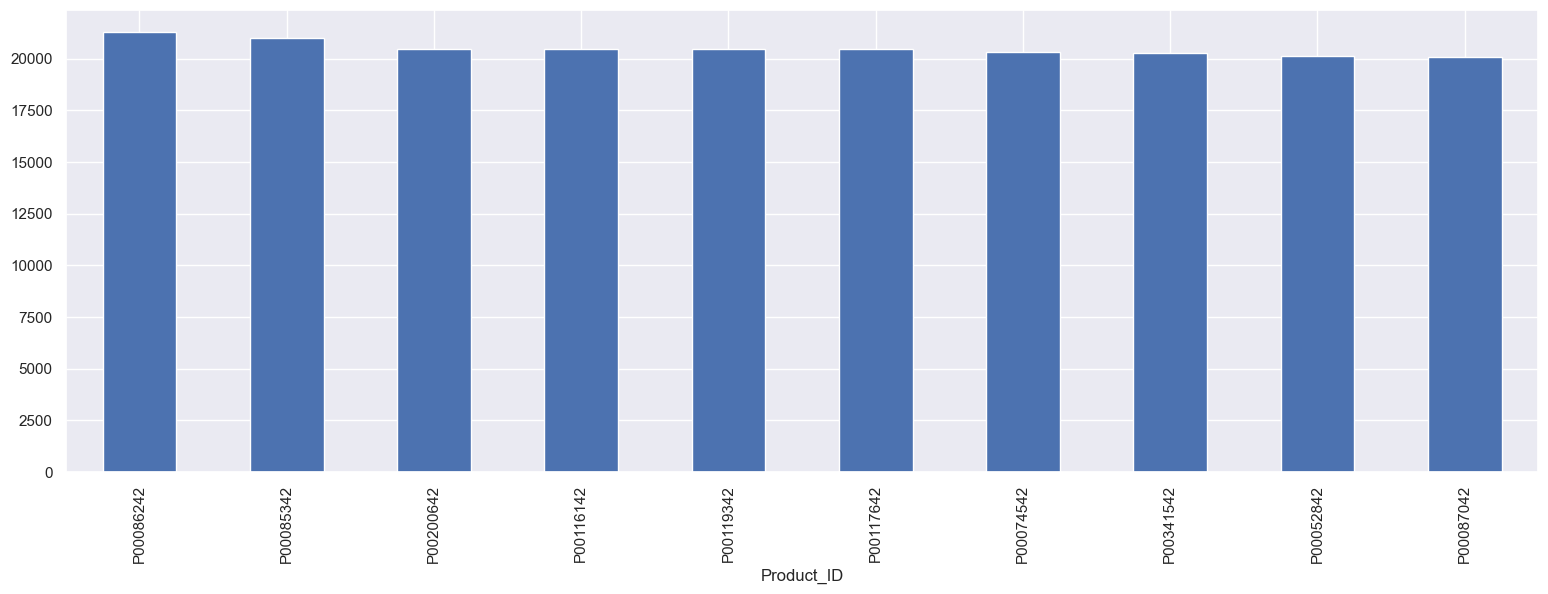

In [49]:
df.groupby('Product_ID').mean()['Purchase'].sort_values().nlargest(10).plot(kind='bar')

# Combining Gender and Marital Status

In [50]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [53]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))

df['Marital_Gender']=l

In [54]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


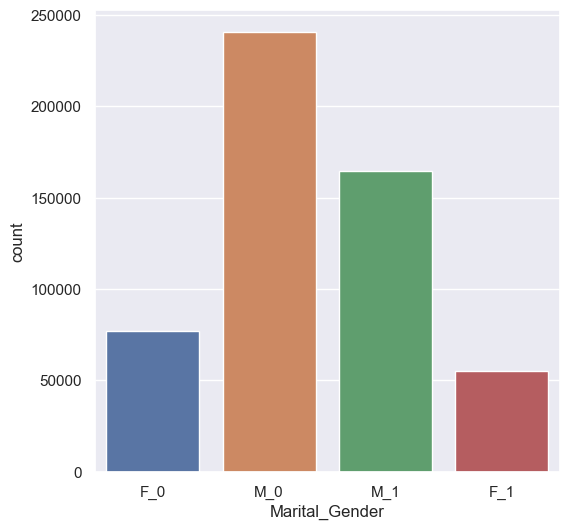

In [57]:
sns.countplot(x='Marital_Gender',data=df)
sns.set(rc={'figure.figsize':(1,6)})

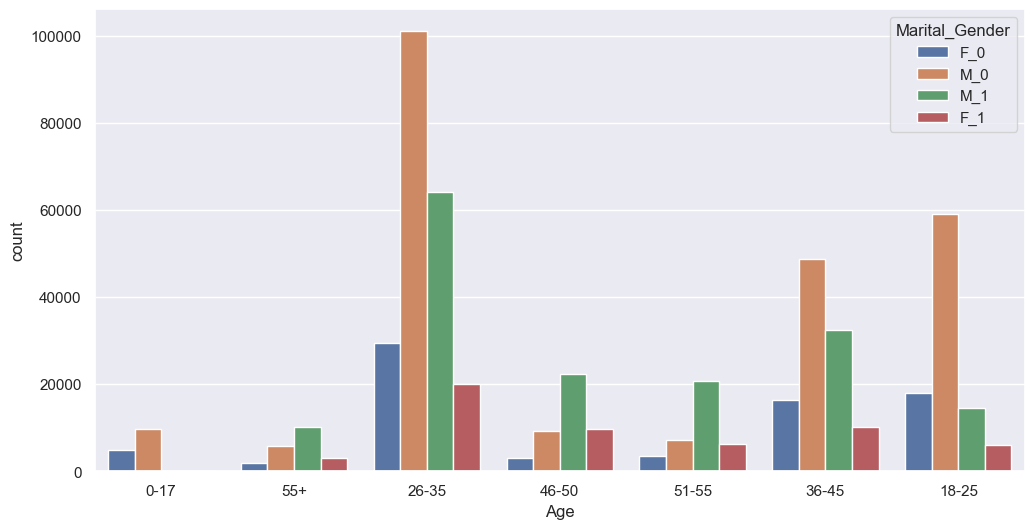

In [62]:
sns.countplot(x='Age',hue='Marital_Gender',data=df)
sns.set(rc={'figure.figsize':(12,6)})